- ### Nama : Nur Muhammad Fadilah
- ### NIM : 20220801114

# Import library yang dibutuhkan
Pada bagian awal, kita mengimpor library yang diperlukan:

- **pandas**: Untuk mengelola dan memanipulasi data dalam bentuk DataFrame.
- **numpy**: Untuk komputasi numerik (meskipun pada contoh ini tidak terlalu digunakan).
- **matplotlib.pyplot**: Untuk visualisasi hasil prediksi.
- **scikit-learn**: Library utama untuk Machine Learning, termasuk ```train_test_split``` untuk membagi dataset, ```LinearRegression``` untuk model regresi linier, dan ```mean_squared_error``` serta ```r2_score``` untuk evaluasi model.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Buat dataset sederhana dengan satuan
Data dummy dibuat dengan dua variabel:

- ```Tahun```: Tahun harga rumah.
- ```Harga_Rumah```: Harga rumah yang berkaitan dengan luas tanah dalam jutaan.
##### Data ini disusun dalam dictionary lalu diubah menjadi DataFrame menggunakan ```pandas.DataFrame()```. DataFrame adalah struktur data 2D yang memudahkan pengolahan data di Python

In [11]:
data = {
      'Tahun': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      'Harga_Rumah (juta Rp)': [200, 250, 270, 300, 330, 370, 400, 420, 450, 470]  # Satuan dalam juta rupiah
}

df = pd.DataFrame(data)

print("Dataset dengan Satuan:")
print(df)
print()

Dataset dengan Satuan:
   Tahun  Harga_Rumah (juta Rp)
0   2015                    200
1   2016                    250
2   2017                    270
3   2018                    300
4   2019                    330
5   2020                    370
6   2021                    400
7   2022                    420
8   2023                    450
9   2024                    470



# Pisahkan fitur dan label
Di sini, kita memisahkan:

- ```Fitur (X)```: Input yang akan kita gunakan untuk prediksi, yaitu kolom Luas_Tanah.
- ```Label (y)```: Output atau target yang akan diprediksi, yaitu kolom Harga_Rumah.
##### ```X``` berbentuk 2D array (DataFrame) karena bisa mengandung beberapa kolom fitur, sedangkan ```y``` berbentuk 1D (Series).

In [12]:
X = df[['Tahun']]  # Fitur: Tahun Harga
y = df['Harga_Rumah (juta Rp)']  # Label: Harga rumah

# Bagi data menjadi data latih dan uji
Kita menggunakan fungsi ```train_test_split``` dari scikit-learn untuk membagi dataset menjadi:

- **Data latih (train)**: Data yang akan digunakan untuk melatih model.
- **Data uji (test)**: Data yang akan digunakan untuk menguji performa model.
##### Parameter ```test_size=0.2``` berarti 20% data akan dijadikan data uji dan 80% untuk data latih. ```random_state=42``` memastikan pembagian data dilakukan secara konsisten setiap kali kode dijalankan.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Linear Regression
Model *Linear Regression* dibuat dengan memanggil ```LinearRegression()``` dari scikit-learn. Ini adalah model sederhana yang mencoba mencari hubungan linier antara fitur dan label.



In [14]:
model = LinearRegression()

# Latih model dengan data latih
Model dilatih menggunakan data latih dengan metode ```fit(X_train, y_train)```. Di sini, model mempelajari hubungan antara luas tanah dan harga rumah dari data yang diberikan.

In [15]:
model.fit(X_train, y_train)

LinearRegression()

# Prediksi menggunakan data uji
Setelah model dilatih, kita menggunakan model tersebut untuk membuat prediksi terhadap data uji. Prediksi dilakukan dengan metode ```predict(X_test)```, yang menghasilkan estimasi harga rumah berdasarkan data luas tanah di data uji.

In [16]:
y_pred = model.predict(X_test)

# Evaluasi model
Hasil prediksi dievaluasi menggunakan dua metrik utama:

- ***Mean Squared Error (MSE)***: Mengukur rata-rata kesalahan kuadrat antara nilai aktual dan prediksi. Semakin kecil nilai MSE, semakin baik model.
- ***R-squared (R²)***: Menunjukkan seberapa baik model dapat menjelaskan variabilitas data. Nilai R² berkisar antara 0 hingga 1, semakin mendekati 1, semakin baik model.

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 63.52556480381122
R-squared (R2): 0.9936474435196189


# Visualisasi hasil prediksi
- **Scatter Plot**: Menampilkan data asli berupa titik-titik pada grafik, di mana sumbu X adalah ```Luas_Tanah``` dan sumbu Y adalah ```Harga_Rumah```.
- **Garis Prediksi**: Menampilkan hasil prediksi model sebagai garis merah yang menunjukkan hubungan linier antara ```Luas_Tanah``` dan ```Harga_Rumah```. Ini memudahkan kita untuk membandingkan hasil prediksi dengan data asli.

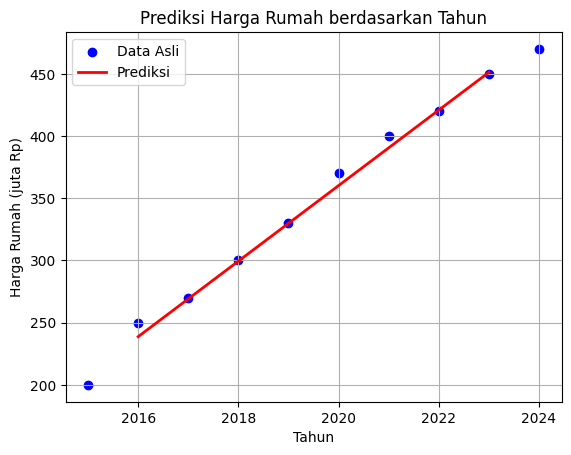

In [18]:
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediksi')
plt.xlabel('Tahun')
plt.ylabel('Harga Rumah (juta Rp)')
plt.title('Prediksi Harga Rumah berdasarkan Tahun')
plt.legend()
plt.grid()
plt.show()


## Hasil evaluasi model menunjukkan:

- Mean Squared Error (MSE): Nilai MSE sebesar 63.53 menunjukkan bahwa rata-rata kesalahan kuadrat antara nilai aktual dan prediksi adalah sekitar 63.53 juta rupiah. Semakin kecil nilai MSE, semakin baik model dalam melakukan prediksi. Dalam konteks ini, meskipun ada kesalahan, nilainya relatif kecil jika dibandingkan dengan rentang harga rumah.

- R-squared (R²): Nilai R² sebesar 0.9936 menunjukkan bahwa model dapat menjelaskan sekitar 99.36% dari variabilitas data harga rumah. Ini berarti model memiliki kemampuan yang sangat baik dalam memprediksi harga berdasarkan tahun, dengan sedikit varians yang tidak bisa dijelaskan oleh model.

Secara keseluruhan, hasil ini menunjukkan bahwa model regresi linier yang dibangun sangat efektif dalam memprediksi harga rumah berdasarkan tahun.